In [ ]:
import os
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import warnings

data = files.upload()

TypeError: 'NoneType' object is not subscriptable

**Suppressing warnings**

In [1]:
warnings.filterwarnings("ignore")

NameError: name 'warnings' is not defined

**Important and loading the dataset**

In [ ]:
df = pd.read_csv('loans.csv', index_col='client_id')

**Displaying the first 5 rows of the dataset**

In [ ]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
          loan_type  loan_amount  repaid  loan_id  loan_start    loan_end  \
client_id                                                                   
46109          home        13672       0    10243  2002-04-16  2003-12-20   
46109        credit         9794       0    10984  2003-10-21  2005-07-17   
46109          home        12734       1    10990  2006-02-01  2007-07-05   
46109          cash        12518       1    10596  2010-12-08  2013-05-05   
46109        credit        14049       1    11415  2010-07-07  2012-05-21   

           rate  
client_id        
46109      2.15  
46109      1.25  
46109      0.68  
46109      1.24  
46109      3.13  


**Checking the info of the dataset**

In [ ]:
print("\nInfo of the dataset:")
print(df.info())


Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB
None


**Checking for missing values**

In [ ]:
print("\nPresence of missing values:")
print(df.isnull().sum())


Presence of missing values:
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64


**Checking for outliers using Boxplot**

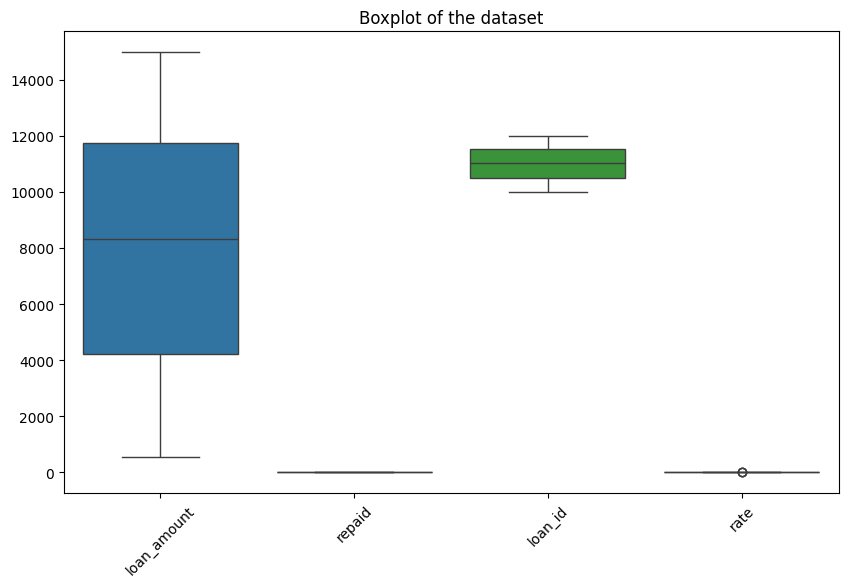

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of the dataset")
plt.xticks(rotation=45)
plt.show()

**Treating outliers**

a. Presence of SQRT transformation

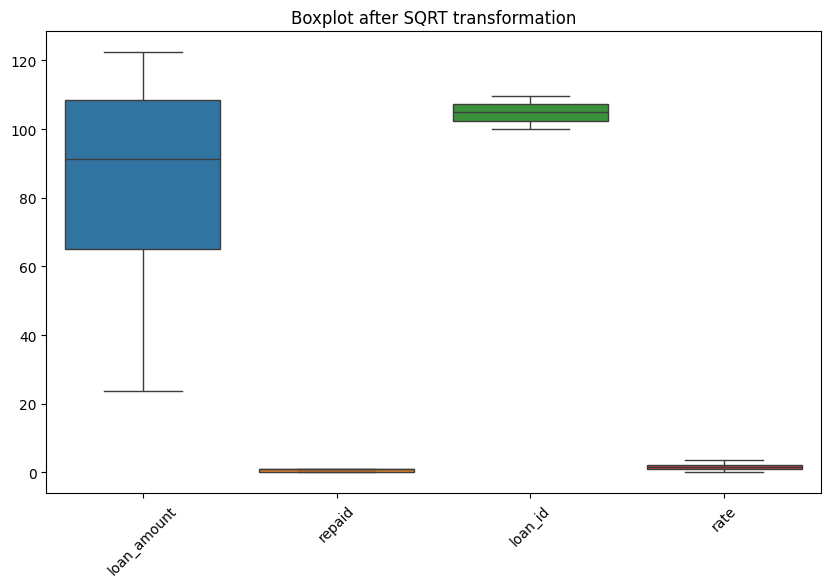

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

df[numeric_columns] = df[numeric_columns].apply(np.sqrt)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot after SQRT transformation")
plt.xticks(rotation=45)
plt.show()

B. Presence of Z-Score capping approach

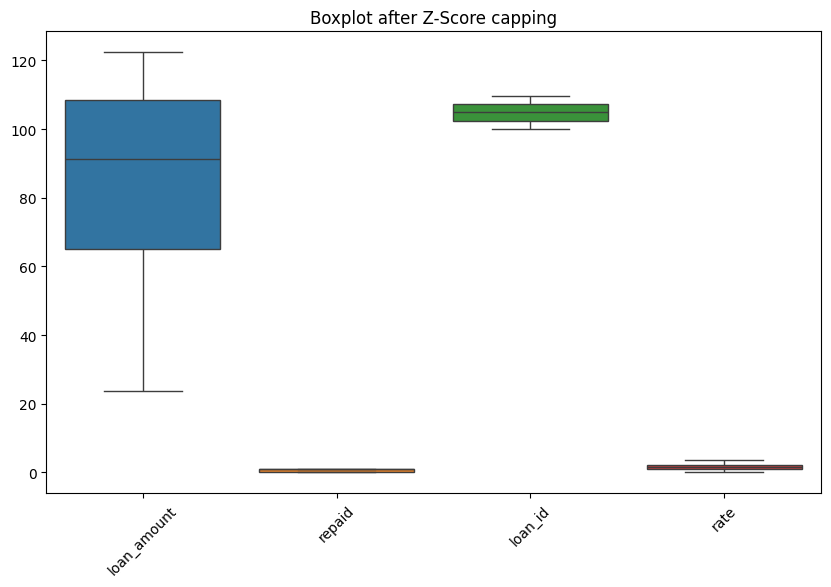

In [ ]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
threshold = 3
outliers = (z_scores > threshold)

df_numeric = df.select_dtypes(include=[np.number])
df_numeric[outliers] = np.where(outliers, threshold, df_numeric[outliers])

df[df_numeric.columns] = df_numeric

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot after Z-Score capping")
plt.xticks(rotation=45)
plt.show()

**Scaling numerical variables using Min-Max Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

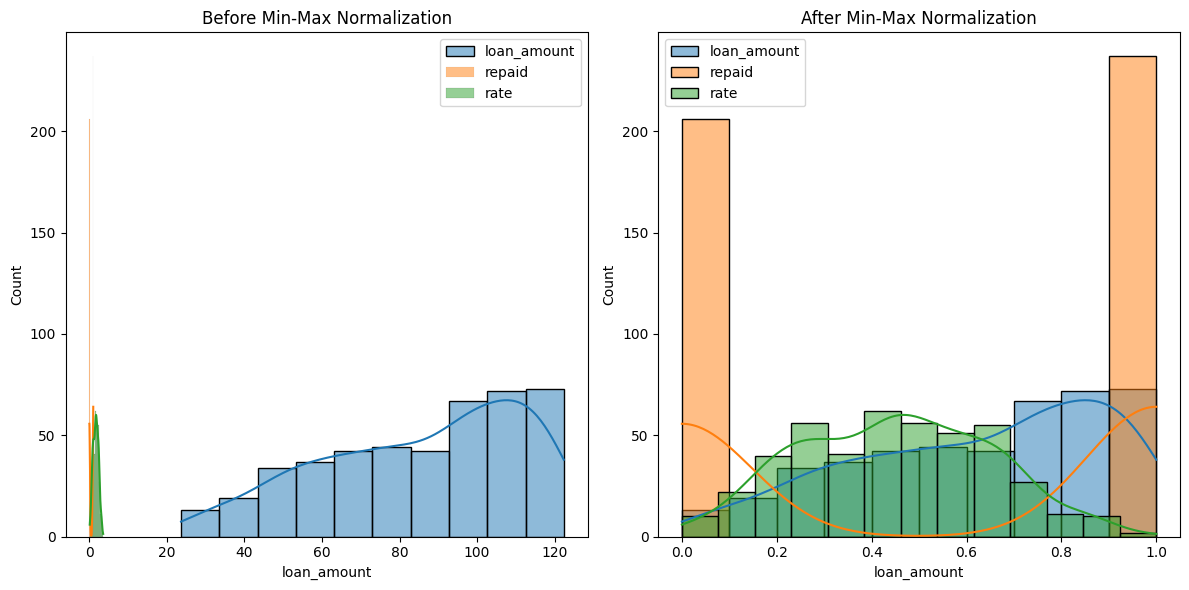

In [ ]:
numeric_columns = ['loan_amount', 'repaid', 'rate']

df_normalized = df.copy()
scaler = MinMaxScaler()

df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for col in numeric_columns:
    sns.histplot(df[col], kde=True, label=col, alpha=0.5)
plt.title('Before Min-Max Normalization')
plt.legend()

plt.subplot(1, 2, 2)
for col in numeric_columns:
    sns.histplot(df_normalized[col], kde=True, label=col, alpha=0.5)
plt.title('After Min-Max Normalization')
plt.legend()

plt.tight_layout()
plt.show()

Display the skewness and kurtosis graphs for Loan Amount

Skewness of Loan Amount: -0.4648343607823575
Kurtosis of Loan Amount: -0.8445788695574743


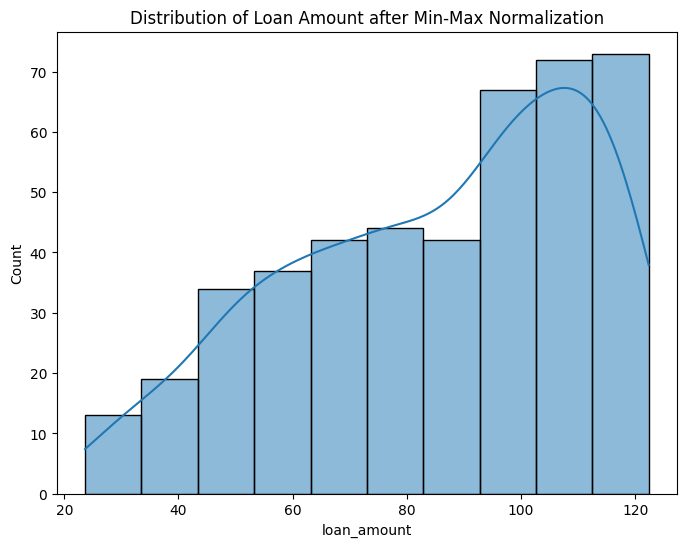

In [ ]:
from scipy.stats import skew, kurtosis

loan_amount_skewness = skew(df['loan_amount'])
loan_amount_kurtosis = kurtosis(df['loan_amount'])

print(f"Skewness of Loan Amount: {loan_amount_skewness}")
print(f"Kurtosis of Loan Amount: {loan_amount_kurtosis}")

# You can also visualize the distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['loan_amount'], kde=True)
plt.title('Distribution of Loan Amount after Min-Max Normalization')
plt.show()

**Encoding categorical variables into dummy variables using pd.get_dummies approach that shows a 5 rows**

In [ ]:
categorical_columns = ['loan_type']

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print(df_encoded.head())

           loan_amount  repaid     loan_id loan_start   loan_end      rate  \
client_id                                                                    
46109       116.927328     0.0  101.207707 2002-04-16 2003-12-20  1.466288   
46109        98.964640     0.0  104.804580 2003-10-21 2005-07-17  1.118034   
46109       112.845026     1.0  104.833201 2006-02-01 2007-07-05  0.824621   
46109       111.883868     1.0  102.936874 2010-12-08 2013-05-05  1.113553   
46109       118.528478     1.0  106.841003 2010-07-07 2012-05-21  1.769181   

           loan_tenure_days  loan_type_credit  loan_type_home  loan_type_other  
client_id                                                                       
46109                   613                 0               1                0  
46109                   635                 1               0                0  
46109                   519                 0               1                0  
46109                   879                 0   

**Creating new derived features to calculate the tenure of the loan using loan_start and loan_end**

In [ ]:
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])

df['loan_tenure_days'] = (df['loan_end'] - df['loan_start']).dt.days

print(df[['loan_start', 'loan_end', 'loan_tenure_days']].head())

          loan_start   loan_end  loan_tenure_days
client_id                                        
46109     2002-04-16 2003-12-20               613
46109     2003-10-21 2005-07-17               635
46109     2006-02-01 2007-07-05               519
46109     2010-12-08 2013-05-05               879
46109     2010-07-07 2012-05-21               684


**Splitting the data into training and test sets (80-20 division)**

In [ ]:
from sklearn.model_selection import train_test_split

features = df.drop(['loan_amount', 'loan_id', 'loan_start', 'loan_end'], axis=1)
target = df['loan_amount']

print("Features shape:", features.shape)
print("Target shape:", target.shape)

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Features shape: (443, 4)
Target shape: (443,)
x_train shape: (354, 4)
x_test shape: (89, 4)
y_train shape: (354,)
y_test shape: (89,)
